In [1]:
import json
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from pathlib import Path
plt.rc('font', family='Malgun Gothic') # 윈도우즈

In [4]:
MODEL_FOLDERS = [
    "SimpleDNN_날짜미포함", 
    "SimpleDNN_날짜포함",
    "SimpleDNN_LAG포함",
    "SimpleDNN_LAG_휴일포함",
    "EmbeddingDNN_날짜미포함",
    "EmbeddingDNN_LAG포함",
    "EmbeddingDNN_LAG_휴일포함",
    "LGBM",
    "XGBoost"
]

In [5]:
results = []
    
for folder in MODEL_FOLDERS:
    result_path = os.path.join(folder, "result.json")
    
    if os.path.exists(result_path):
        with open(result_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
            results.append(data)
        print(f"✓ Loaded: {folder}")
    else:
        print(f"✗ Not found: {result_path}")

✓ Loaded: SimpleDNN_날짜미포함
✓ Loaded: SimpleDNN_날짜포함
✓ Loaded: SimpleDNN_LAG포함
✓ Loaded: SimpleDNN_LAG_휴일포함
✓ Loaded: EmbeddingDNN_날짜미포함
✓ Loaded: EmbeddingDNN_LAG포함
✓ Loaded: EmbeddingDNN_LAG_휴일포함
✓ Loaded: LGBM
✓ Loaded: XGBoost



✓ Saved visualization to: model_comparison.png


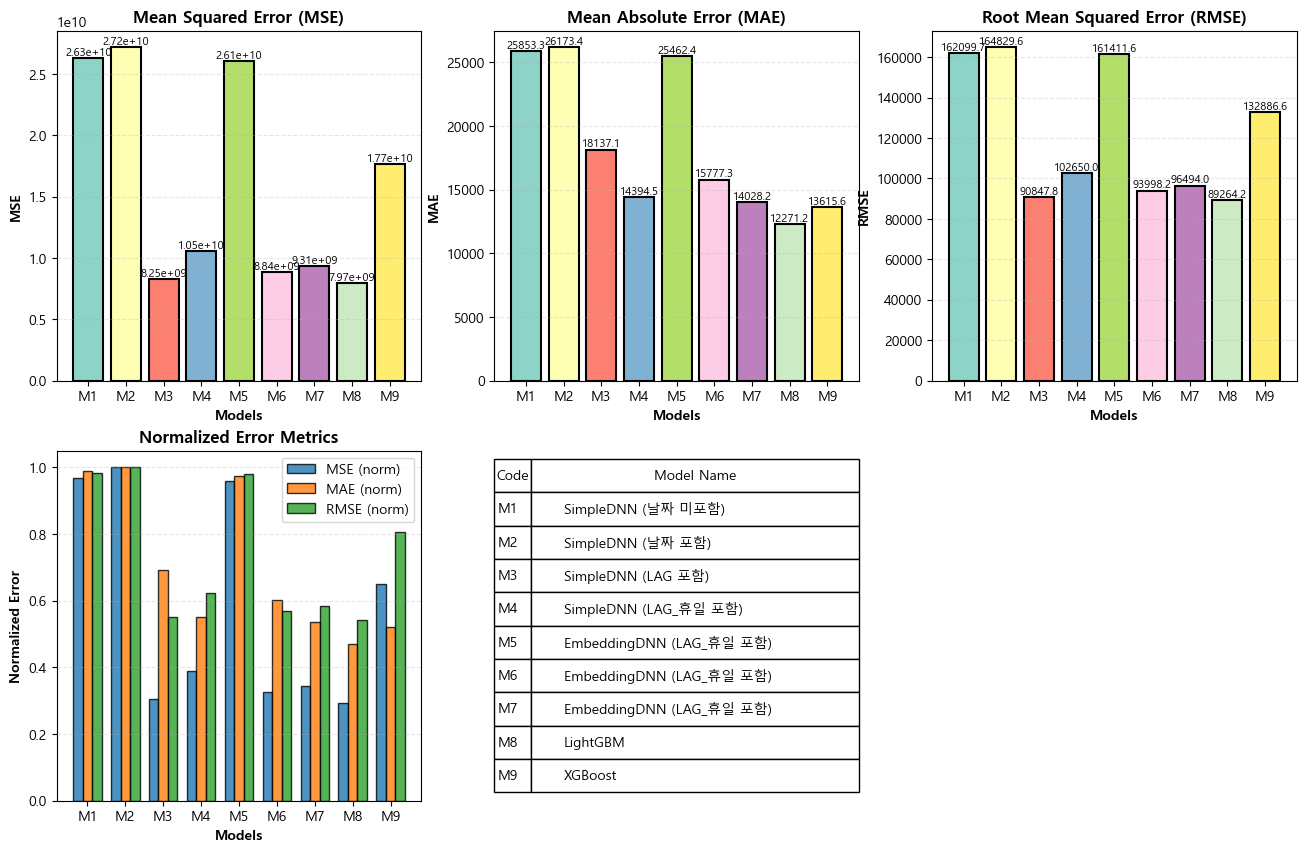

In [6]:
# Extract data
models = [r['model'] for r in results]
mse_values = [r['mse'] for r in results]
mae_values = [r['mae'] for r in results]
rmse_values = [r['rmse'] for r in results]

# Create figure with subplots
fig = plt.figure(figsize=(16, 10))

# Color scheme
colors = plt.cm.Set3(np.linspace(0, 1, len(models)))

# 1. MSE Comparison
ax1 = plt.subplot(2, 3, 1)
bars1 = ax1.bar(range(len(models)), mse_values, color=colors, edgecolor='black', linewidth=1.5)
ax1.set_xlabel('Models', fontsize=10, fontweight='bold')
ax1.set_ylabel('MSE', fontsize=10, fontweight='bold')
ax1.set_title('Mean Squared Error (MSE)', fontsize=12, fontweight='bold')
ax1.set_xticks(range(len(models)))
ax1.set_xticklabels([f'M{i+1}' for i in range(len(models))], rotation=0)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars1, mse_values)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{val:.2e}',
            ha='center', va='bottom', fontsize=8, rotation=0)

# 2. MAE Comparison
ax2 = plt.subplot(2, 3, 2)
bars2 = ax2.bar(range(len(models)), mae_values, color=colors, edgecolor='black', linewidth=1.5)
ax2.set_xlabel('Models', fontsize=10, fontweight='bold')
ax2.set_ylabel('MAE', fontsize=10, fontweight='bold')
ax2.set_title('Mean Absolute Error (MAE)', fontsize=12, fontweight='bold')
ax2.set_xticks(range(len(models)))
ax2.set_xticklabels([f'M{i+1}' for i in range(len(models))], rotation=0)
ax2.grid(axis='y', alpha=0.3, linestyle='--')

for i, (bar, val) in enumerate(zip(bars2, mae_values)):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{val:.1f}',
            ha='center', va='bottom', fontsize=8)

# 3. RMSE Comparison
ax3 = plt.subplot(2, 3, 3)
bars3 = ax3.bar(range(len(models)), rmse_values, color=colors, edgecolor='black', linewidth=1.5)
ax3.set_xlabel('Models', fontsize=10, fontweight='bold')
ax3.set_ylabel('RMSE', fontsize=10, fontweight='bold')
ax3.set_title('Root Mean Squared Error (RMSE)', fontsize=12, fontweight='bold')
ax3.set_xticks(range(len(models)))
ax3.set_xticklabels([f'M{i+1}' for i in range(len(models))], rotation=0)
ax3.grid(axis='y', alpha=0.3, linestyle='--')

for i, (bar, val) in enumerate(zip(bars3, rmse_values)):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{val:.1f}',
            ha='center', va='bottom', fontsize=8)

# 4. Normalized Comparison (All metrics together)
ax4 = plt.subplot(2, 3, 4)

# Normalize values to [0, 1] for comparison
mse_norm = np.array(mse_values) / max(mse_values)
mae_norm = np.array(mae_values) / max(mae_values)
rmse_norm = np.array(rmse_values) / max(rmse_values)

x = np.arange(len(models))
width = 0.25

ax4.bar(x - width, mse_norm, width, label='MSE (norm)', alpha=0.8, edgecolor='black')
ax4.bar(x, mae_norm, width, label='MAE (norm)', alpha=0.8, edgecolor='black')
ax4.bar(x + width, rmse_norm, width, label='RMSE (norm)', alpha=0.8, edgecolor='black')

ax4.set_xlabel('Models', fontsize=10, fontweight='bold')
ax4.set_ylabel('Normalized Error', fontsize=10, fontweight='bold')
ax4.set_title('Normalized Error Metrics', fontsize=12, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels([f'M{i+1}' for i in range(len(models))], rotation=0)
ax4.legend()
ax4.grid(axis='y', alpha=0.3, linestyle='--')

# Legend
ax5 = plt.subplot(2, 3, 5)
ax5.axis('tight')
ax5.axis('off')
# Create legend table
legend_data = []
for i, name in enumerate(models):
    legend_data.append([f'M{i+1}', name])

table = ax5.table(cellText=legend_data,
                    colLabels=['Code', 'Model Name'],
                    cellLoc='left',
                    loc='center',
                    colWidths=[0.1, 0.9])

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

# Save the figure
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved visualization to: model_comparison.png")

plt.show()

In [7]:
import csv
    
with open("모델비교.csv", 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(['Model Name', 'MSE', 'MAE', 'RMSE', 'N_Test', 'Saved_At'])

    for r in results:
        writer.writerow([
            r['model'],
            r['mse'],
            r['mae'],
            r['rmse'],
            r['n_test'],
            r['saved_at'],
        ])